# Goal
1. To visualize car data for exploration.
2. To visualize the data about model evaluation. Examples include:
    1. Look at the variance in prediction per target variable (boxplot)


In [15]:
%matplotlib inline
import pandas as pd
from ggplot import *

In [5]:
cars = pd.read_csv('../data/imports-85.data')
cars.columns = [u'risk', u'normalizedLosses', u'make', u'fuelType', u'aspiration', u'numDoors',
       u'bodyStyle', u'driveWheels', u'engineLocation', u'wheelBase',
       u'length', u'width', u'height', u'curbWeight', u'engineType',
       u'numCylinders', u'engineSize', u'fuelSystem', u'bore', u'stroke',
       u'compressionRatio', u'horsepower', u'peakRPM', u'cityMPG', u'highwayMPG', u'price'] # add columns names

## Looking at the top 6 features by boost importance

In [6]:
cars[['engineType', 'fuelType', 'driveWheels', 'curbWeight', 'numDoors', 'wheelBase']].head()

,engineType,fuelType,driveWheels,curbWeight,numDoors,wheelBase
0,dohc,gas,rwd,2548,two,88.6
1,ohcv,gas,rwd,2823,two,94.5
2,ohc,gas,fwd,2337,four,99.8
3,ohc,gas,4wd,2824,four,99.4
4,ohc,gas,fwd,2507,two,99.8


C:\Users\dickm\AppData\Local\Continuum\Anaconda2\lib\site-packages\matplotlib\patches.py:107: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"


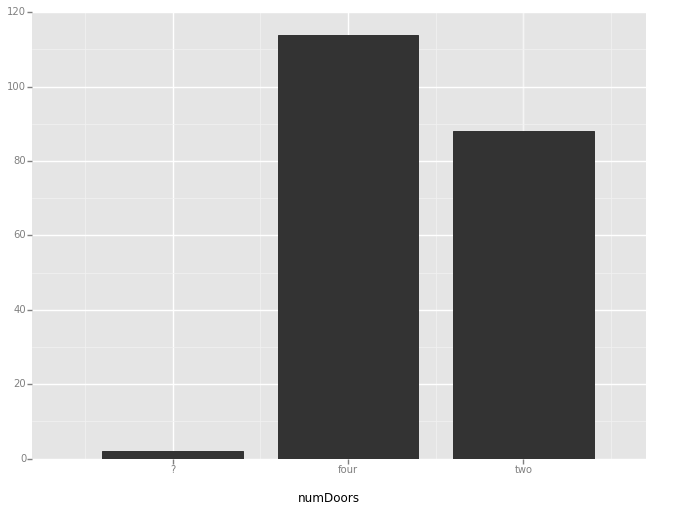

<ggplot: (18024266)>

In [31]:
ggplot(cars, aes(x='numDoors')) + geom_bar(color='red')

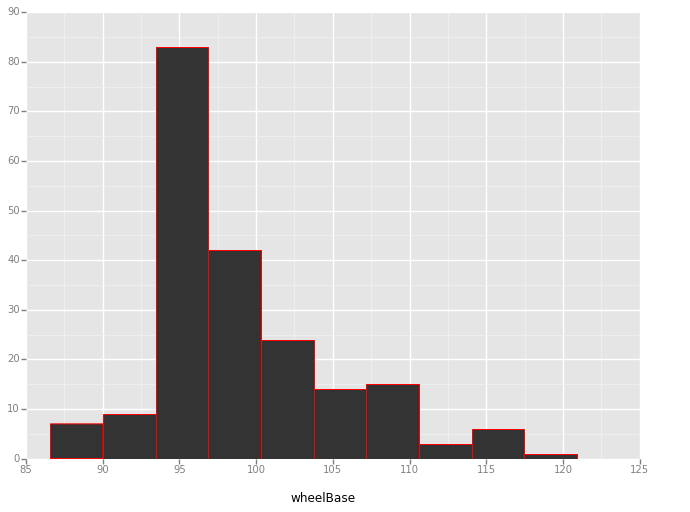

<ggplot: (18133301)>

In [32]:
ggplot(cars, aes(x='wheelBase')) + geom_histogram(color='red')

In [23]:
cars['numDoors'].unique()

array(['two', 'four', '?'], dtype=object)